## 💡 WHAT ARE THE SALARIES OF THE SIX MOST COMMON JOBS IN THE UNITED STATES?

* STEPS: 
    1. Import all necessary libraries, datasets & clean up data
    2. Find the 6 most common jobs in the US
    3. Plot the data using a box plot 


## Step 1: Import all necessary libraries, datasets & Clean all data 

Similar to [1_Skills_Demand.ipynb](1_Skills_Demand.ipynb), we will have to go import all the necessary libraries, load the datasets and clean up those data in order to use them efficiently. 

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In this analysis, I will focus mainly on the 'Data Analyst' role in the United States for the sake of data variety. 

In [3]:
#Filtering jobs in the United States 
df_US = df[df['job_country'] == 'United States'].copy() 

## Step 2: Find the 6 most common jobs in the United States 

Since in the dataframe, there are 10 general job titles. Henceforth, I will narrow down the range of analysis to 6 most common jobs. 

In [5]:
df_US['job_title_short'].value_counts().head(6)

job_title_short
Data Analyst             67816
Data Scientist           58830
Data Engineer            35080
Senior Data Scientist    12946
Senior Data Analyst      11791
Senior Data Engineer      9289
Name: count, dtype: int64

In [9]:
#Put those top 6 job titles into a list 
list = df_US['job_title_short'].value_counts().head(6).index.tolist() 

#Filter the data to only include those top 6 job titles 
df_US = df_US[df_US['job_title_short'].isin(list)] 

#Drop rows with missing salary data in order to correctly calculate the median salary 
df_US.dropna(subset=['salary_year_avg'],inplace=True)

#Show the final result
df_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"[sql, python]","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"[sql, r, python, express]","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
116,Data Scientist,Data Scientist,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-10-04 13:04:23,False,False,United States,year,114000.0,NaN,4 Corner Resources,"[r, python, sql, t-sql, hadoop, spark, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
146,Data Engineer,Data Engineer Graduate (Real Time Communicatio...,"Seattle, WA",via LinkedIn,Full-time,False,"California, United States",2023-10-21 13:06:16,False,True,United States,year,129500.0,NaN,ByteDance,"[golang, scala, python, java, hadoop, spark]","{'libraries': ['hadoop', 'spark'], 'programmin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785563,Data Scientist,Data Scientist I/II (Model Risk Management & M...,"Pensacola, FL",via Navy Federal Credit Union - Talentify,Full-time,False,"Florida, United States",2023-01-11 06:22:10,False,False,United States,year,136400.0,NaN,Navy Federal Credit Union,"[r, python, matplotlib, ggplot2, spark, word, ...","{'analyst_tools': ['word', 'power bi', 'tablea..."
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"[go, python, r, sql, oracle, windows, alteryx,...","{'analyst_tools': ['alteryx', 'power bi', 'tab..."
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",None,None
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"[python, azure, snowflake, spark]","{'cloud': ['azure', 'snowflake'], 'libraries':..."


## Step 3: Plot the data using a box plot

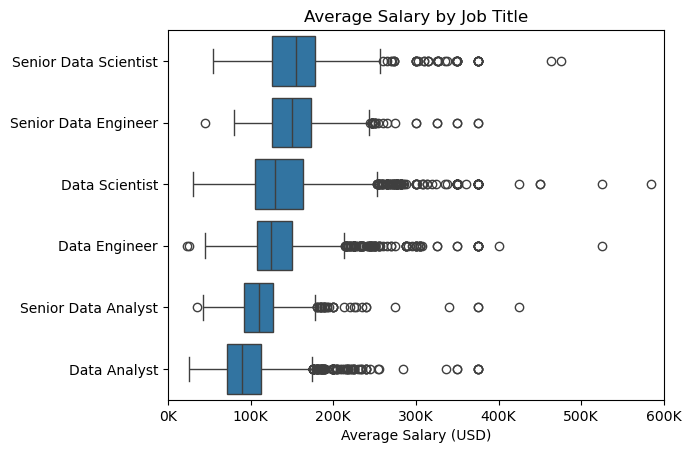

In [8]:
import seaborn as sns 
import matplotlib.ticker as mtick

#Plot the boxplot in order of highest to lowest median salary 
order = df_US.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index.tolist() 

sns.boxplot(df_US,x='salary_year_avg',y='job_title_short',order=order) 
plt.xlim(0,600000)
plt.xlabel("Average Salary (USD)")
plt.ylabel("")
plt.title("Average Salary by Job Title")
ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
